In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import preprocessing
from matplotlib import pyplot as plt


In [79]:
data = pd.read_csv("arrhythmia.data", header=None)
output = pd.DataFrame(index=None, columns=['model','train_Rsquare', 'test_Rsquare', 'train_MSE','test_MSE'])
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


Podaci prikazuju ECG za 452 pacijenta pri čemu svaki zapis sadržava 279 značajki.

1 Age: Age in years , linear

2 Sex: Sex (0 = male; 1 = female) , nominal

3 Height: Height in centimeters , linear

4 Weight: Weight in kilograms , linear

5 QRS duration: Average of QRS duration in msec., linear

6 P-R interval: Average duration between onset of P and Q waves in msec., linear

7 Q-T interval: Average duration between onset of Q and offset of T waves in msec., linear

8 T interval: Average duration of T wave in msec., linear

9 P interval: Average duration of P wave in msec., linear Vector angles in degrees on front plane of:, linear

10 QRS

11 T

12 P

13 QRST

14 J

15 Heart rate: Number of heart beats per minute ,linear

Handling missing values

In [80]:
import numpy as np
data[13] = data[13].replace('?',np.NaN)
data[14] = data[14].replace('?',np.NaN)
data[11] = data[11].replace('?',np.NaN)
data[10] = data[10].replace('?',np.NaN)
data[12] = data[12].replace('?',np.NaN)

Splitting the dataset

In [81]:
Data_X = data.drop(data.iloc[:, -1], axis=1)
Data_Y = data.iloc[:, -1]
np.unique(Data_Y, return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16]),
 array([245,  44,  15,  15,  13,  25,   3,   2,   9,  50,   4,   5,  22]))

In [82]:
#Drop J column
Data_X.drop(columns=[13])

,0,11,12,17,18,19,20,21,22,23,...,270,271,272,273,274,275,276,277,278,279
0,75,64,-2,44,0,0,32,0,0,0,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,-17,31,0,0,0,24,0,0,0,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,70,66,80,0,0,24,0,0,0,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,-5,20,20,0,0,48,0,0,0,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,61,3,40,0,0,28,0,0,0,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,40,-27,24,0,0,28,0,0,0,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,52,79,36,0,0,24,0,0,0,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,-61,-70,40,0,0,40,0,0,0,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,-22,43,0,0,0,32,0,0,0,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [83]:
from sklearn.impute import SimpleImputer
z=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(Data_X)
Data_X = pd.DataFrame(data=z,columns=Data_X.columns.values)
Data_X.isnull().sum()

0      0
11     0
12     0
13     0
17     0
      ..
275    0
276    0
277    0
278    0
279    0
Length: 267, dtype: int64

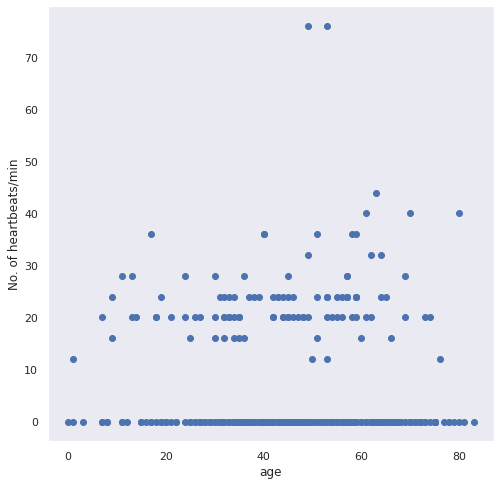

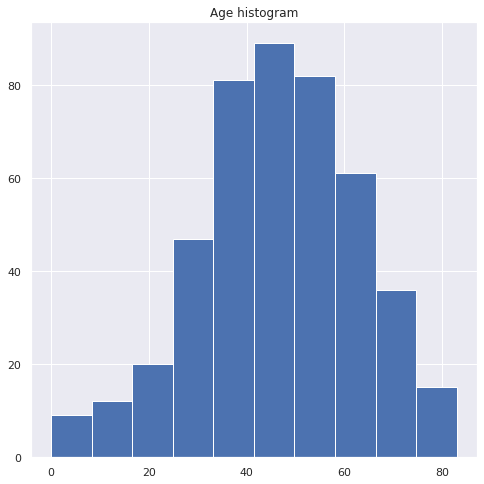

Najmlađi ispitanik:  0.0
Najstariji ispitanik:  83.0


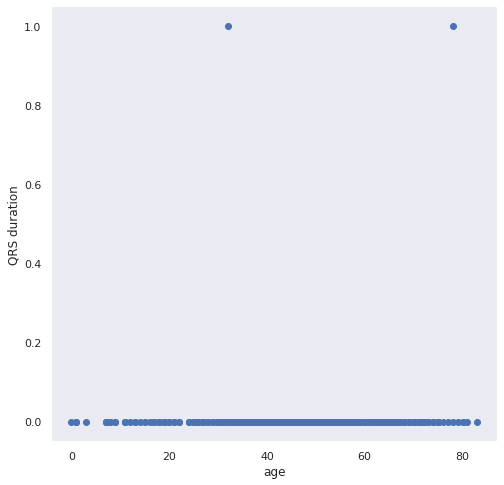

In [84]:
plt.scatter(Data_X.iloc[:, 0], Data_X.iloc[:, 14])
plt.xlabel('age')
plt.ylabel('No. of heartbeats/min')
plt.grid()
plt.show()

plt.hist(Data_X.iloc[:, 0])
plt.title('Age histogram')
plt.show()
print('Najmlađi ispitanik: ', Data_X.iloc[:, 0].min())
print('Najstariji ispitanik: ', Data_X.iloc[:, 0].max())

plt.scatter(Data_X.iloc[:, 0], Data_X.iloc[:, 12].sort_values())
plt.xlabel('age')
plt.ylabel('QRS duration')
plt.grid()
plt.show()

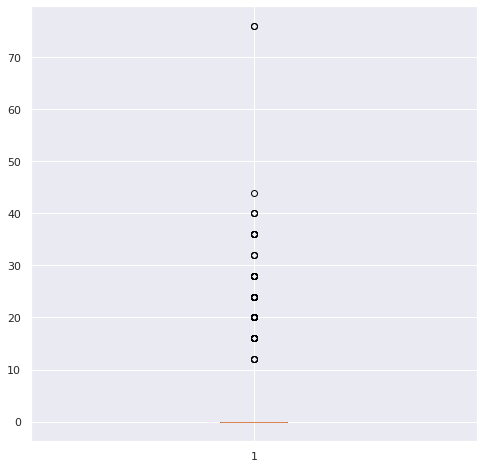

In [85]:
#boxplot broja otkucaja srca
plt.boxplot(Data_X.iloc[:, 14].astype('float'))
plt.show()

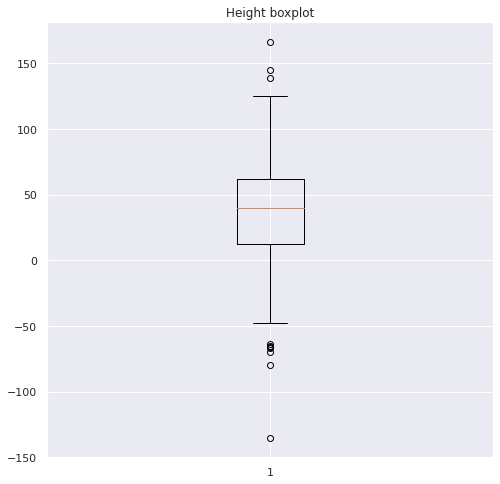

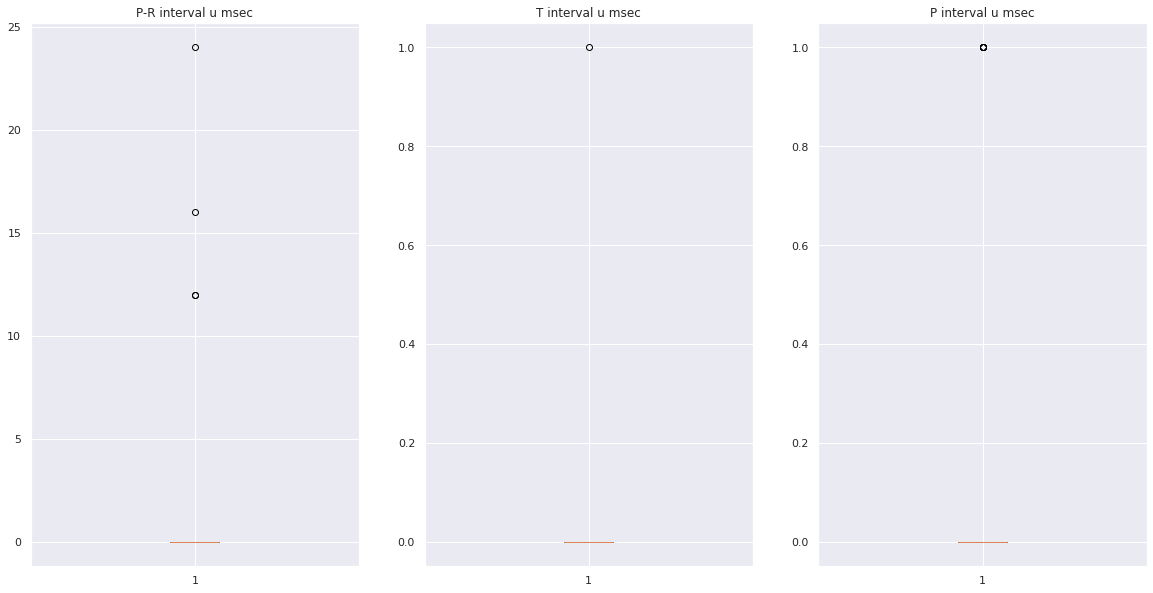

In [86]:
#boxplot visine
plt.boxplot(Data_X.iloc[:, 2].astype('float'))
plt.title('Height boxplot')
plt.show()
#boxplot P-R intervala u msec, T intervala i P intervala
fig, ax = plt.subplots(1, 3, figsize=(20, 10)) 
ax[0].boxplot(Data_X.iloc[:, 5].astype('float'))
ax[0].title.set_text('P-R interval u msec')
ax[1].boxplot(Data_X.iloc[:, 8].astype('float'))
ax[1].title.set_text('T interval u msec')
ax[2].boxplot(Data_X.iloc[:, 9].astype('float'))
ax[2].title.set_text('P interval u msec')

plt.show()

In [87]:
cols = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 14]
corr_data = Data_X.iloc[:, :15].copy()
corr_data = corr_data.join(Data_Y)
corr_data.head()

,0,11,12,13,17,18,19,20,21,22,23,24,25,26,27,279
0,75.0,64.0,-2.0,-13.592105,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
1,56.0,-17.0,31.0,-13.592105,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
2,54.0,70.0,66.0,23.000000,80.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,10
3,55.0,-5.0,20.0,-13.592105,20.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,75.0,61.0,3.0,-13.592105,40.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7


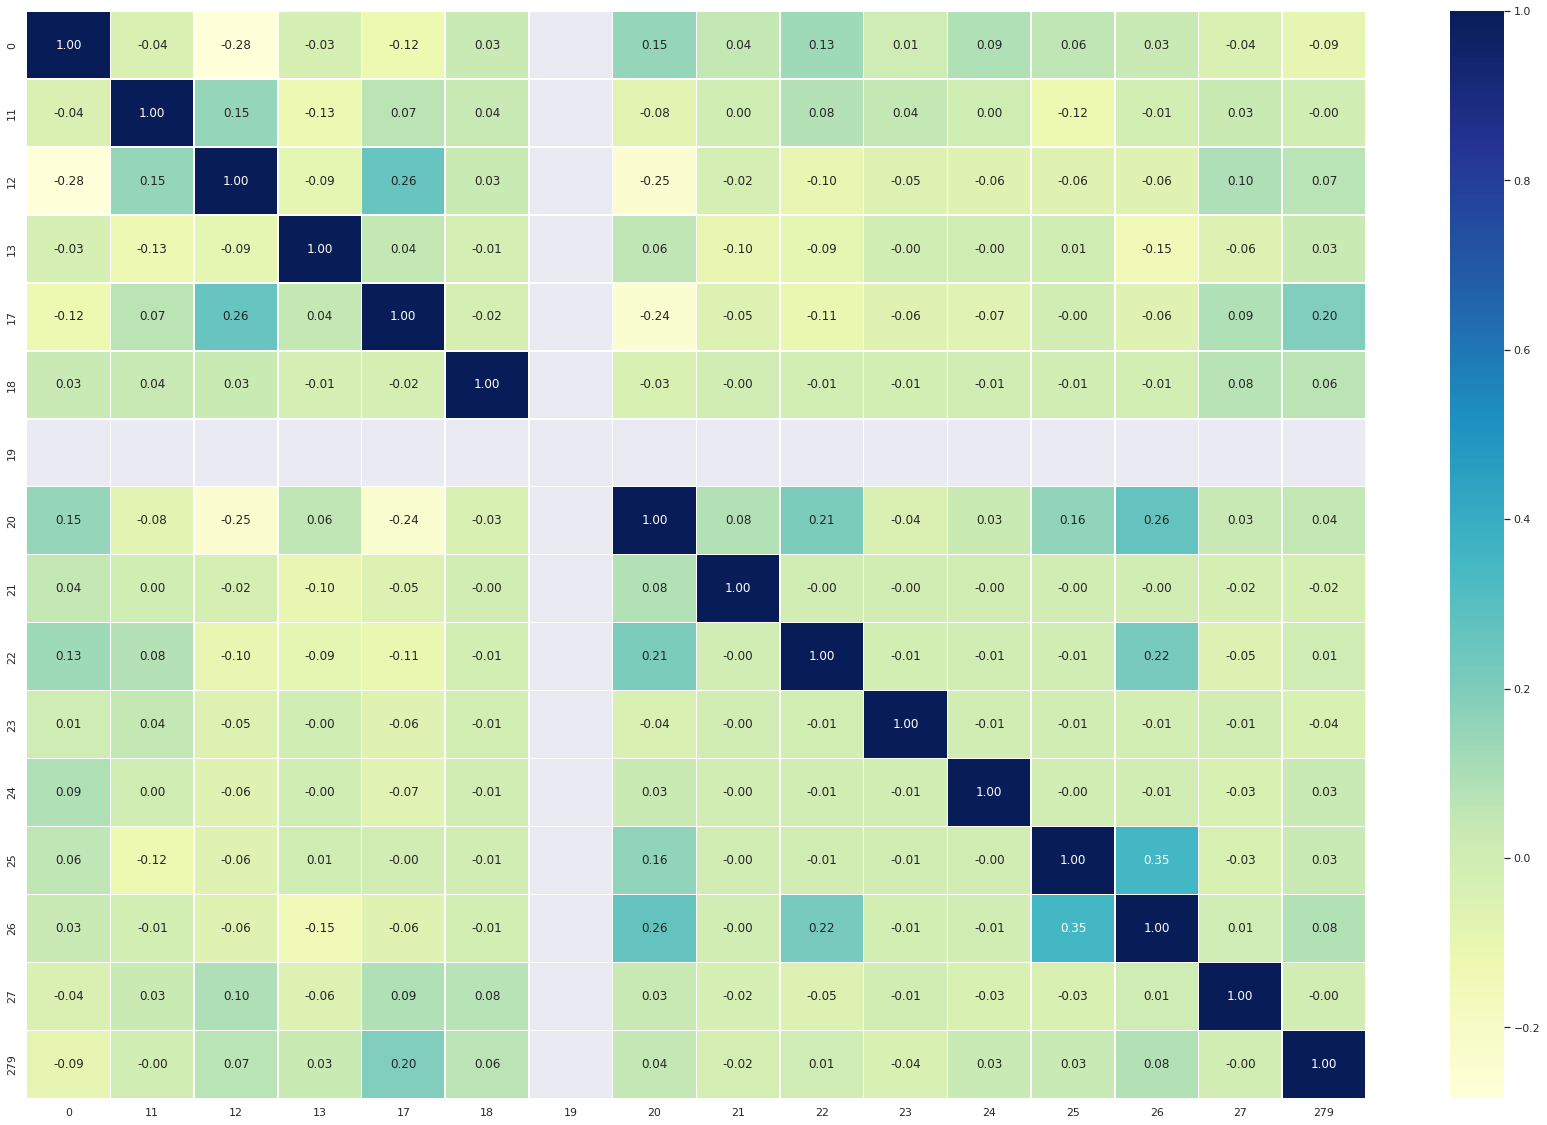

In [88]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,20)})
sns.heatmap(corr_data.corr(), annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.show()

Splitting to train and test dataset

In [89]:
data_train_x, data_test_x, data_train_y, data_test_y = train_test_split(Data_X, Data_Y, random_state=2)

print('Shape of train {}, shape of test {}'.format(data_train_x.shape, data_test_x.shape))

Shape of train (339, 267), shape of test (113, 267)


In [90]:
#Scaling
scaler = StandardScaler()
data_train_x = scaler.fit_transform(data_train_x)
data_test_x = scaler.transform(data_test_x)

# PCA analiza

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


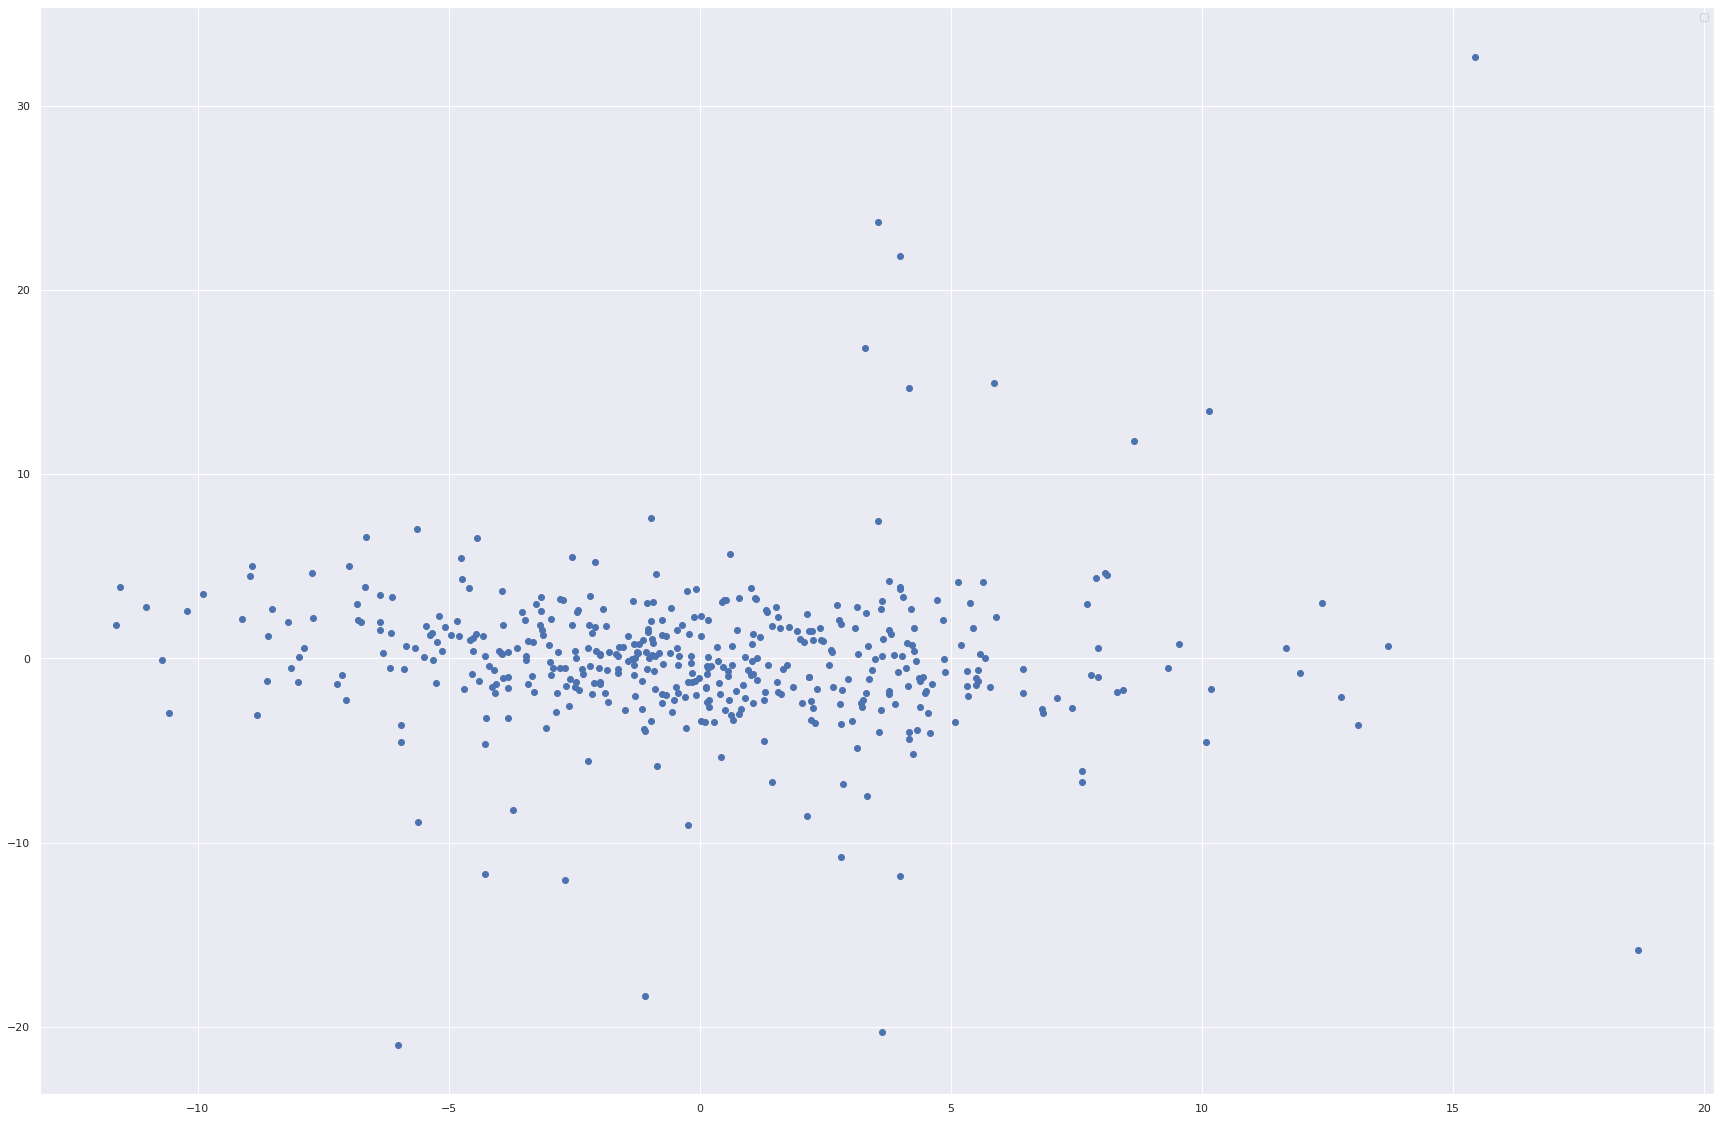

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
X_pca = pipe.fit_transform(Data_X)

plot = plt.scatter(X_pca[:,0], X_pca[:,1])
plt.legend(handles=plot.legend_elements()[0])
plt.show()

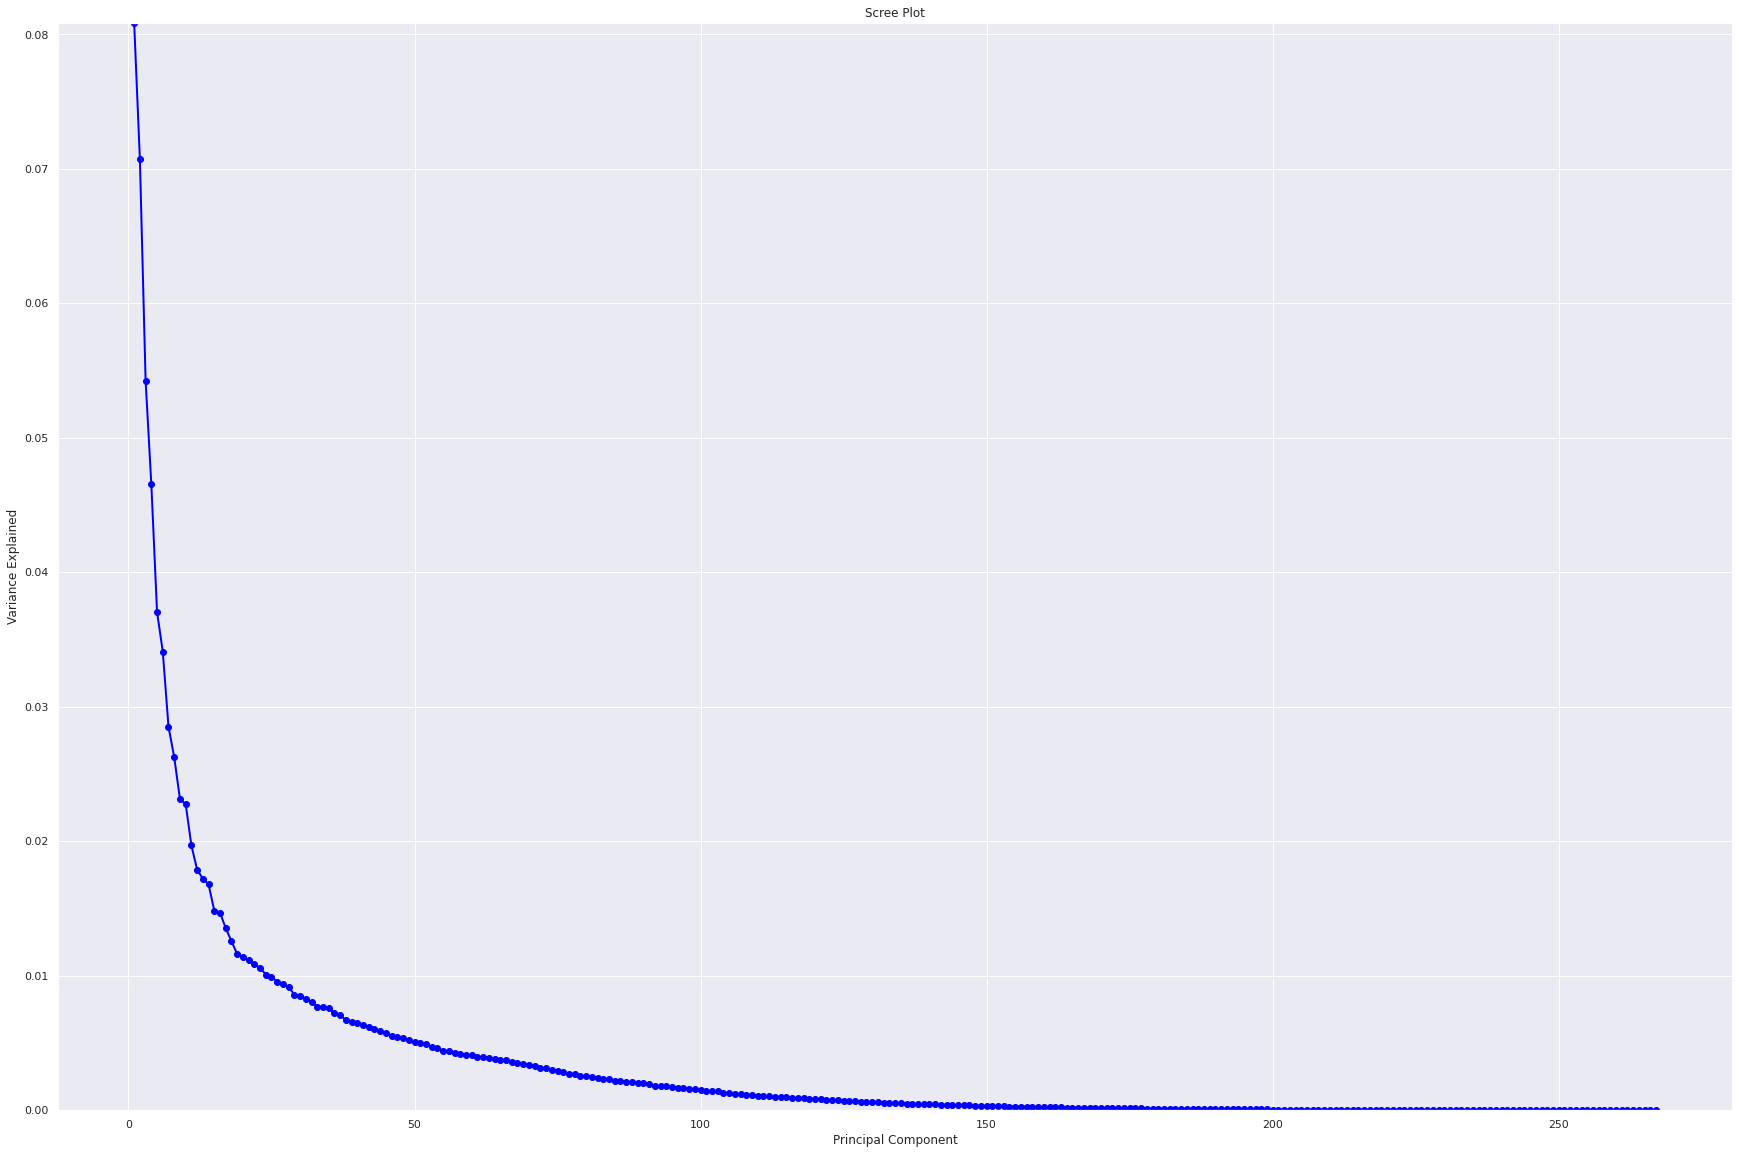

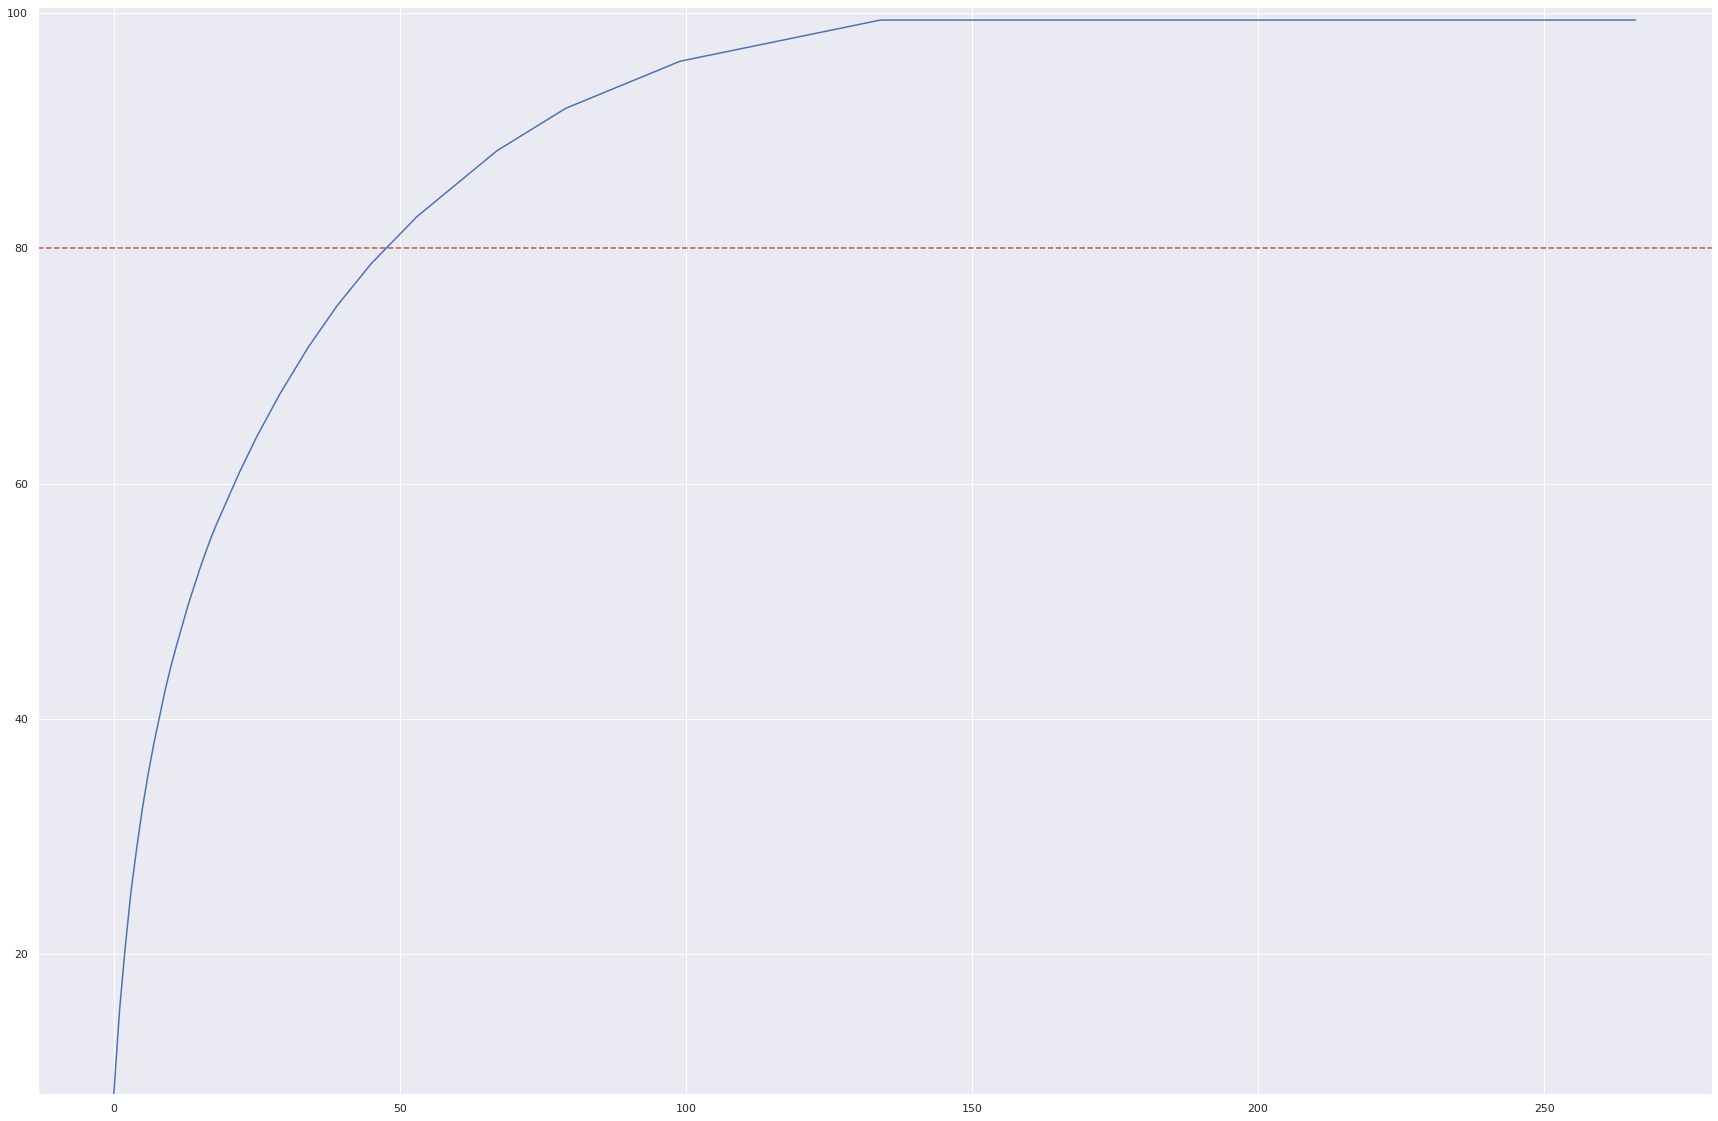

In [92]:
PC_values = np.arange(pca.n_components_) + 1
pve = pca.explained_variance_ratio_
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, max(pve))
plt.axhline(y=1, color='r', linestyle='--')
plt.show()
var = np.cumsum(np.round(pve, decimals=3))*100
plt.ylim(min(var), 100.5)
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()

# Modeli strojnog učenja

Nad podacima provodimo algoritme k-NN, logističku regresiju i linearni SVM.

Najprije ih provodimo nad podacima koji će samo prikazivati je li se dogodila aritmija(1) ili nije(0). 

In [93]:
#Sve klase veće od 1 se klasificiraju kao artimija
data_train_y_is_arr = (data_train_y > 1).astype(int)
data_test_y_is_arr = (data_test_y > 1).astype(int)

## KNN regresija

In [94]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [95]:
## We are creating a grid for which all n_neighbors values are to be used for cross validation

param_grid={'weights':['distance', 'uniform'], 'n_neighbors':range(1,100)}

## Using Grid search for exhaustive searching

grid_search = GridSearchCV( KNeighborsClassifier(),param_grid, cv = 10)
grid_search.fit(data_train_x, data_train_y_is_arr)
train_Rsquare = grid_search.score(data_train_x, data_train_y_is_arr)
test_Rsquare = grid_search.score(data_test_x, data_test_y_is_arr)
train_MSE = mean_squared_error(data_train_y_is_arr, grid_search.predict(data_train_x))
test_MSE = mean_squared_error(data_test_y_is_arr, grid_search.predict(data_test_x))
output = output.append(pd.Series({'model':'KNN Classifier','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
output

,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,KNN Classifier,1.0,0.619469,0.0,0.380531


In [96]:
pd.DataFrame(grid_search.cv_results_)
print(grid_search.best_estimator_)

KNeighborsClassifier(n_neighbors=3, weights='distance')


In [97]:
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(data_train_x, data_train_y_is_arr)
pred = knn.predict(data_test_x)
print(classification_report(data_test_y_is_arr, pred))

              precision    recall  f1-score   support

           0       0.58      0.89      0.70        57
           1       0.76      0.34      0.47        56

    accuracy                           0.62       113
   macro avg       0.67      0.62      0.59       113
weighted avg       0.67      0.62      0.59       113



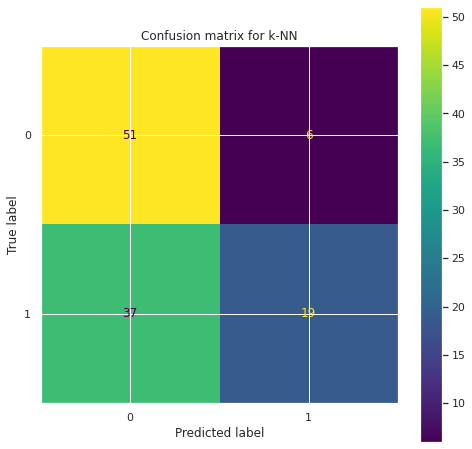

In [98]:
confusion_matrix = metrics.confusion_matrix(data_test_y_is_arr, pred)
plt.rcParams['figure.figsize'] = [8, 8]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.title("Confusion matrix for k-NN")

plt.show()

## Logistička regresija

In [99]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_search_log = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=5)
grid_search_log.fit(data_train_x, data_train_y_is_arr)
train_Rsquare = grid_search_log.score(data_train_x, data_train_y_is_arr)
test_Rsquare = grid_search_log.score(data_test_x, data_test_y_is_arr)
train_MSE = mean_squared_error(data_train_y_is_arr, grid_search_log.predict(data_train_x))
test_MSE = mean_squared_error(data_test_y_is_arr, grid_search_log.predict(data_test_x))
output = output.append(pd.Series({'model':'Logistic Regression','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
output

,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,KNN Classifier,1.0,0.619469,0.0,0.380531
1,Logistic Regression,1.0,0.920354,0.0,0.079646


In [100]:
pd.DataFrame(grid_search_log.cv_results_)
print(grid_search_log.best_estimator_)

LogisticRegression(C=1)


In [101]:
log = LogisticRegression(C=1)
log.fit(data_train_x, data_train_y_is_arr)
pred = log.predict(data_test_x)
print(classification_report(data_test_y_is_arr,pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92        57
           1       0.94      0.89      0.92        56

    accuracy                           0.92       113
   macro avg       0.92      0.92      0.92       113
weighted avg       0.92      0.92      0.92       113



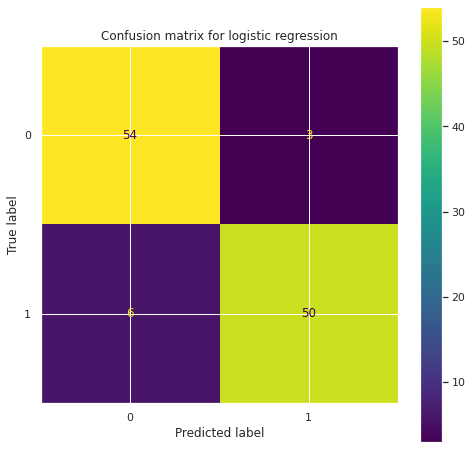

In [102]:
confusion_matrix = metrics.confusion_matrix(data_test_y_is_arr, pred)
plt.rcParams['figure.figsize'] = [8, 8]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.title("Confusion matrix for logistic regression")
plt.show()

## Linearni SVM

In [103]:
from sklearn.svm import LinearSVC

param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000], 'max_iter':[1000,10000] }

grid_search_SVC = GridSearchCV(LinearSVC(random_state=0), param_grid, cv=5)
grid_search_SVC.fit(data_train_x, data_train_y_is_arr)
train_Rsquare = grid_search_SVC.score(data_train_x, data_train_y_is_arr)
test_Rsquare = grid_search_SVC.score(data_test_x, data_test_y_is_arr)
train_MSE = mean_squared_error(data_train_y_is_arr, grid_search_SVC.predict(data_train_x))
test_MSE = mean_squared_error(data_test_y_is_arr, grid_search_SVC.predict(data_test_x))
output = output.append(pd.Series({'model':'Linear SVC','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
output

,model,train_Rsquare,test_Rsquare,train_MSE,test_MSE
0,KNN Classifier,1.0,0.619469,0.0,0.380531
1,Logistic Regression,1.0,0.920354,0.0,0.079646
2,Linear SVC,1.0,0.920354,0.0,0.079646


In [104]:
pd.DataFrame(grid_search_SVC.cv_results_)
print(grid_search_SVC.best_estimator_)

LinearSVC(C=0.1, random_state=0)


In [105]:
linearsvc = LinearSVC(C=0.1, random_state=0)
linearsvc.fit(data_train_x, data_train_y_is_arr)
pred = linearsvc.predict(data_test_x)
print(classification_report(data_test_y_is_arr,pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        57
           1       0.96      0.88      0.92        56

    accuracy                           0.92       113
   macro avg       0.92      0.92      0.92       113
weighted avg       0.92      0.92      0.92       113



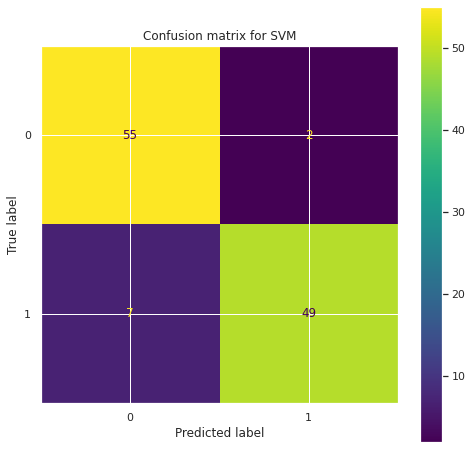

In [106]:
from sklearn import metrics
plt.rcParams['figure.figsize'] = [8, 8]
confusion_matrix = metrics.confusion_matrix(data_test_y_is_arr, pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.title("Confusion matrix for SVM")
plt.show()

## One-vs- rest (OVR) pristup
One-vs-rest pristup za sve klase aritmije

For i  2
k-NN classification report
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        99
           1       1.00      0.07      0.13        14

    accuracy                           0.88       113
   macro avg       0.94      0.54      0.54       113
weighted avg       0.90      0.88      0.84       113



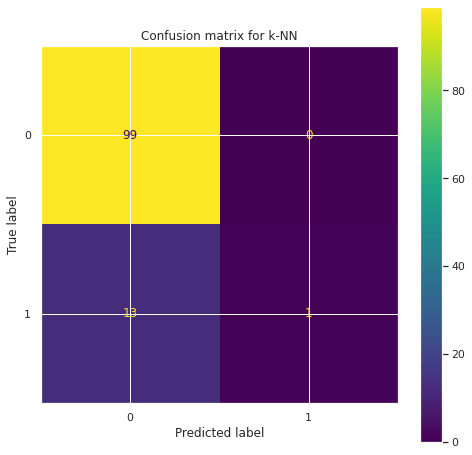

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Logistic regression classification report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.67      0.14      0.24        14

    accuracy                           0.88       113
   macro avg       0.78      0.57      0.59       113
weighted avg       0.86      0.88      0.85       113



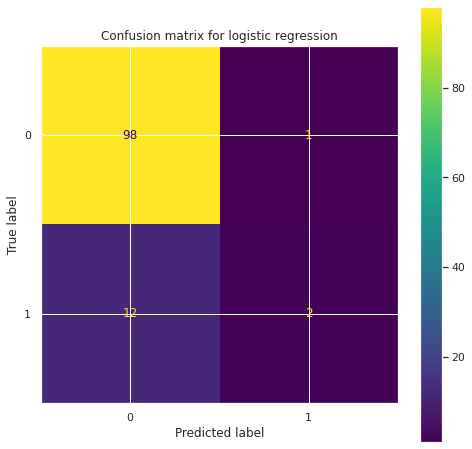

Linear SVC classification report
              precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.56      0.36      0.43        14

    accuracy                           0.88       113
   macro avg       0.73      0.66      0.69       113
weighted avg       0.87      0.88      0.87       113



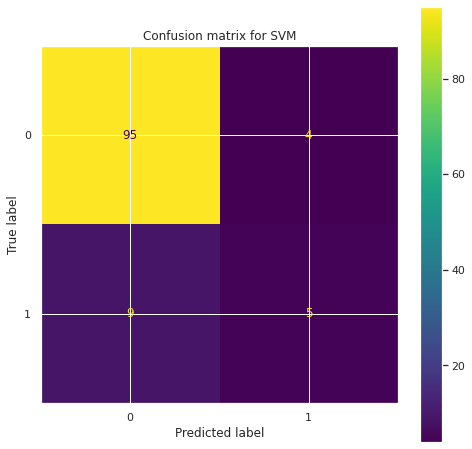

For i  3


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


k-NN classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.17      0.29         6

    accuracy                           0.96       113
   macro avg       0.98      0.58      0.63       113
weighted avg       0.96      0.96      0.94       113



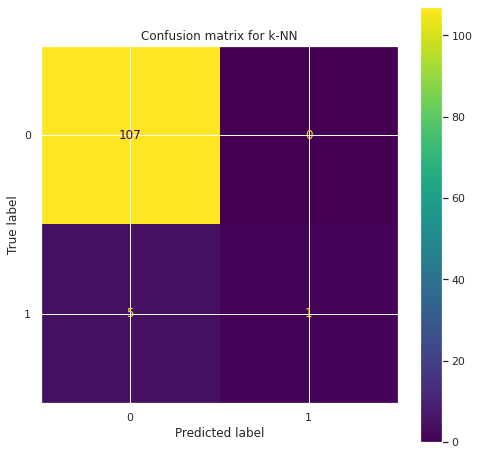

Logistic regression classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       1.00      0.17      0.29         6

    accuracy                           0.96       113
   macro avg       0.98      0.58      0.63       113
weighted avg       0.96      0.96      0.94       113



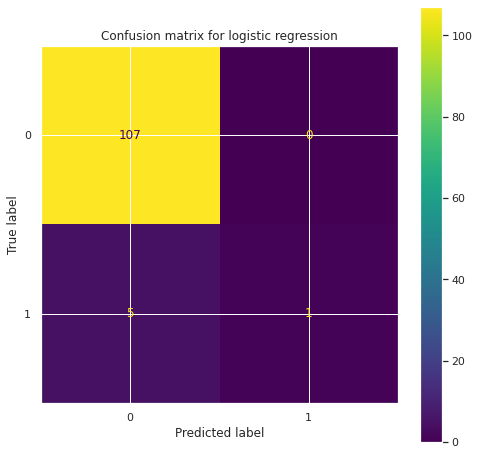

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVC classification report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       107
           1       0.60      0.50      0.55         6

    accuracy                           0.96       113
   macro avg       0.79      0.74      0.76       113
weighted avg       0.95      0.96      0.95       113



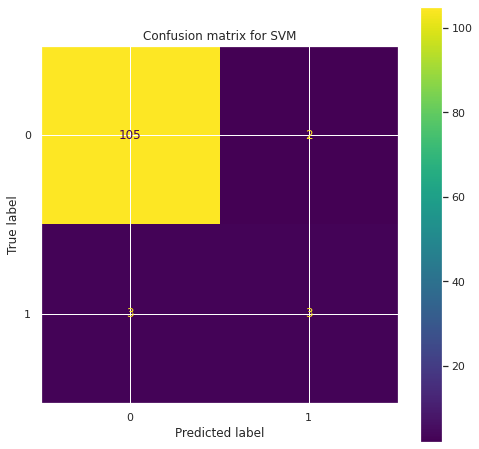

For i  4
k-NN classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       109
           1       0.60      0.75      0.67         4

    accuracy                           0.97       113
   macro avg       0.80      0.87      0.83       113
weighted avg       0.98      0.97      0.97       113



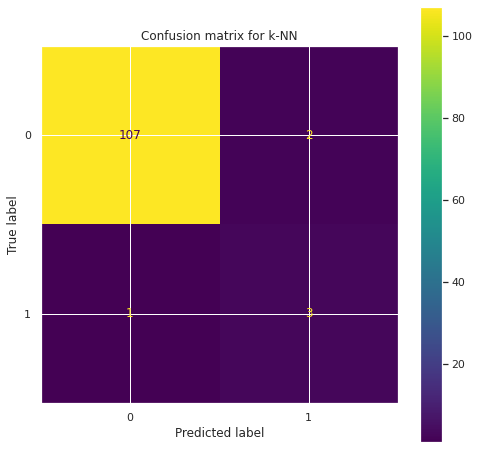

Logistic regression classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       109
           1       0.60      0.75      0.67         4

    accuracy                           0.97       113
   macro avg       0.80      0.87      0.83       113
weighted avg       0.98      0.97      0.97       113



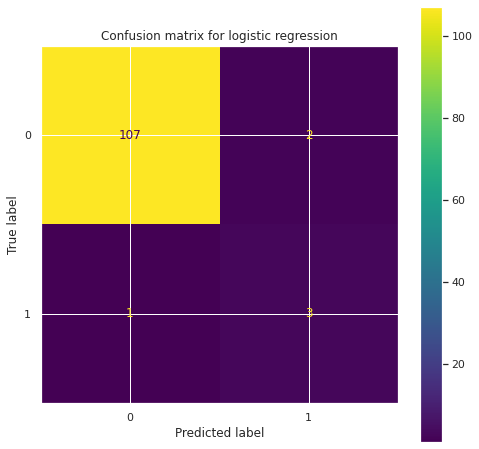

Linear SVC classification report
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       109
           1       0.44      1.00      0.62         4

    accuracy                           0.96       113
   macro avg       0.72      0.98      0.80       113
weighted avg       0.98      0.96      0.96       113



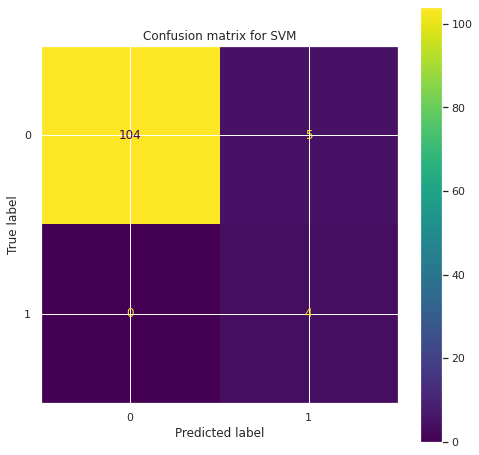

For i  5


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


k-NN classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       109
           1       0.00      0.00      0.00         4

    accuracy                           0.96       113
   macro avg       0.48      0.50      0.49       113
weighted avg       0.93      0.96      0.95       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


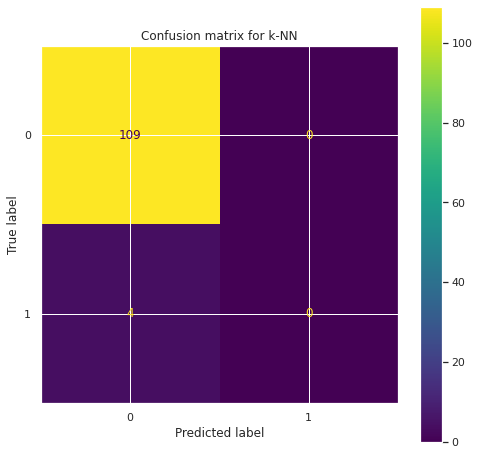

Logistic regression classification report
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       109
           1       0.00      0.00      0.00         4

    accuracy                           0.96       113
   macro avg       0.48      0.50      0.49       113
weighted avg       0.93      0.96      0.94       113



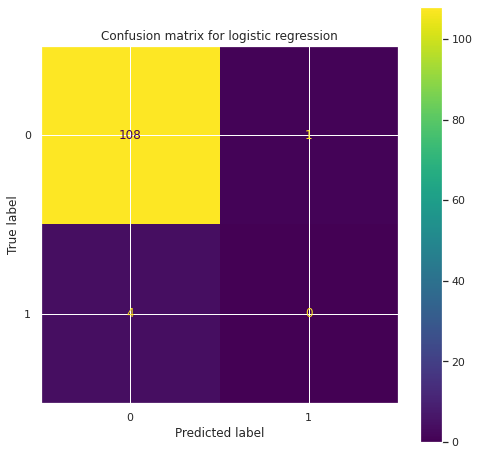

Linear SVC classification report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.25      0.25      0.25         4

    accuracy                           0.95       113
   macro avg       0.61      0.61      0.61       113
weighted avg       0.95      0.95      0.95       113



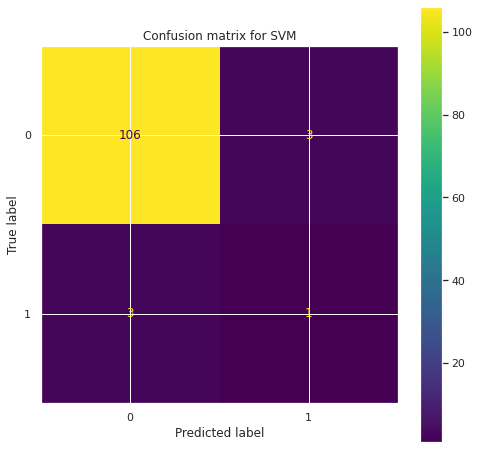

For i  6
k-NN classification report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       107
           1       0.00      0.00      0.00         6

    accuracy                           0.94       113
   macro avg       0.47      0.50      0.48       113
weighted avg       0.90      0.94      0.92       113



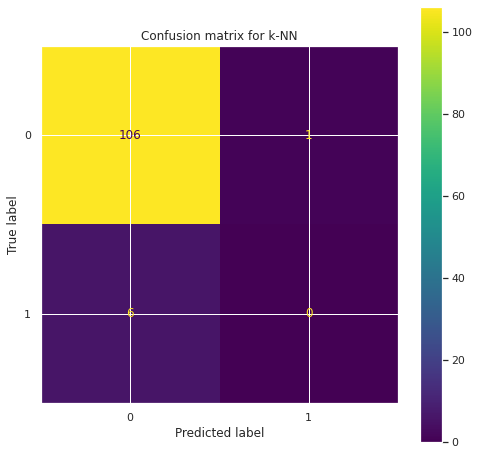

Logistic regression classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       0.00      0.00      0.00         6

    accuracy                           0.95       113
   macro avg       0.47      0.50      0.49       113
weighted avg       0.90      0.95      0.92       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


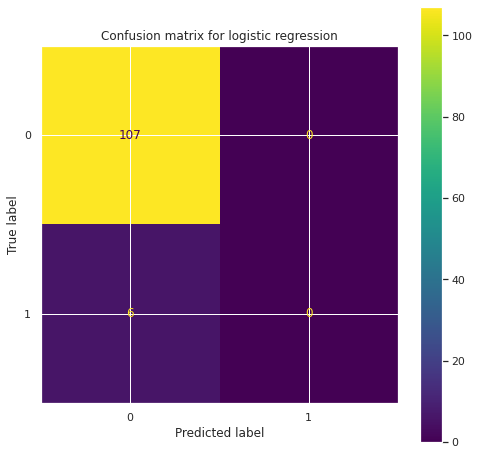

Linear SVC classification report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       0.25      0.17      0.20         6

    accuracy                           0.93       113
   macro avg       0.60      0.57      0.58       113
weighted avg       0.92      0.93      0.92       113



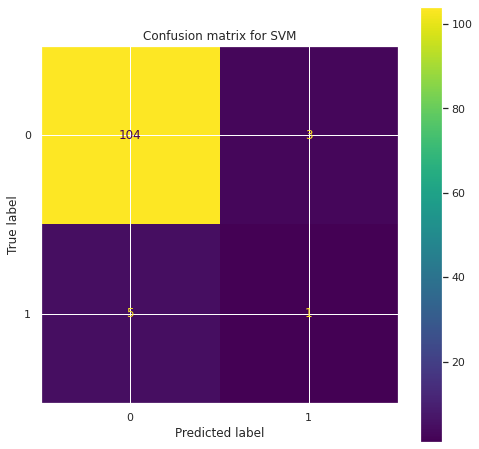

For i  7


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


k-NN classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



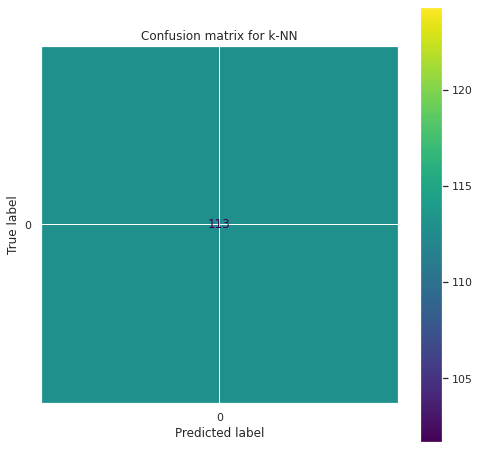

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Logistic regression classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



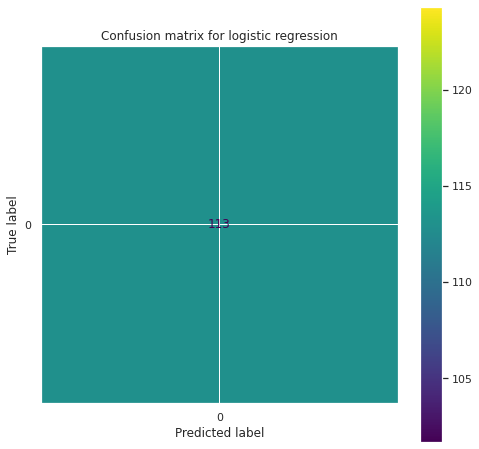

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Linear SVC classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       113
           1       0.00      0.00      0.00         0

    accuracy                           0.99       113
   macro avg       0.50      0.50      0.50       113
weighted avg       1.00      0.99      1.00       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


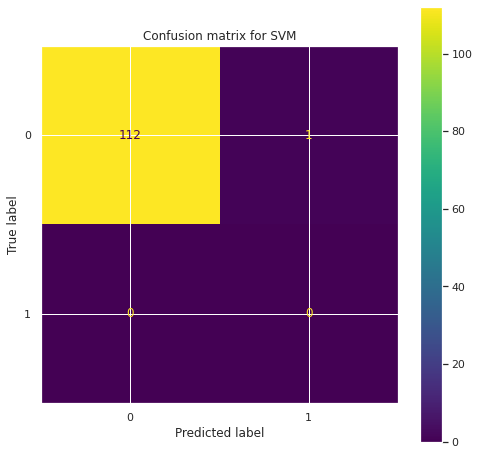

For i  8


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


k-NN classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       112
           1       0.00      0.00      0.00         1

    accuracy                           0.99       113
   macro avg       0.50      0.50      0.50       113
weighted avg       0.98      0.99      0.99       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


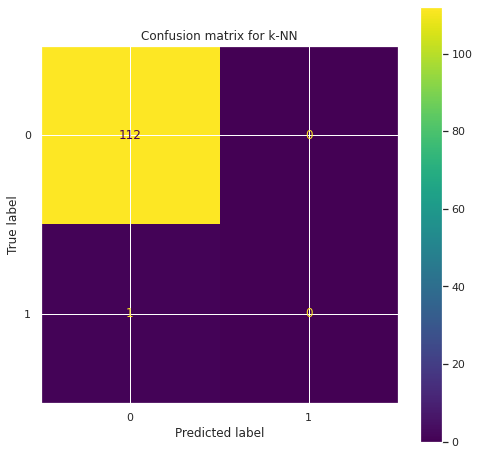

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
7 fits failed out of a total of 35.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1554, in fit
    raise ValueError(
ValueEr

Logistic regression classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       112
           1       0.00      0.00      0.00         1

    accuracy                           0.99       113
   macro avg       0.50      0.50      0.50       113
weighted avg       0.98      0.99      0.99       113



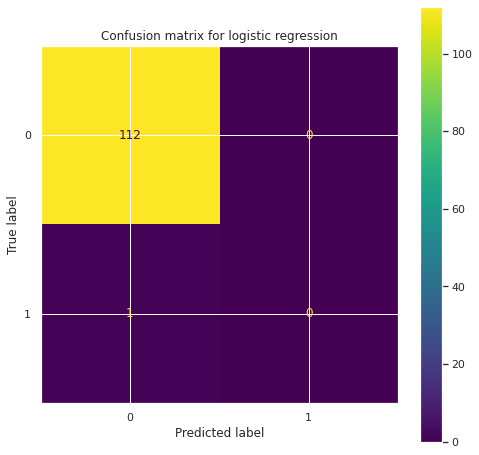

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
18 fits failed out of a total of 90.

Linear SVC classification report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       112
           1       0.00      0.00      0.00         1

    accuracy                           0.98       113
   macro avg       0.50      0.50      0.50       113
weighted avg       0.98      0.98      0.98       113



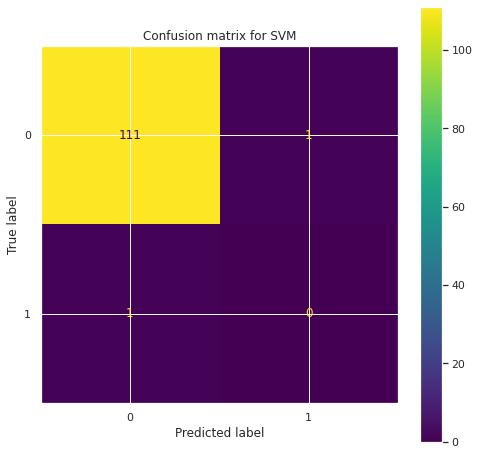

For i  9


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(


k-NN classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       109
           1       0.00      0.00      0.00         4

    accuracy                           0.96       113
   macro avg       0.48      0.50      0.49       113
weighted avg       0.93      0.96      0.95       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


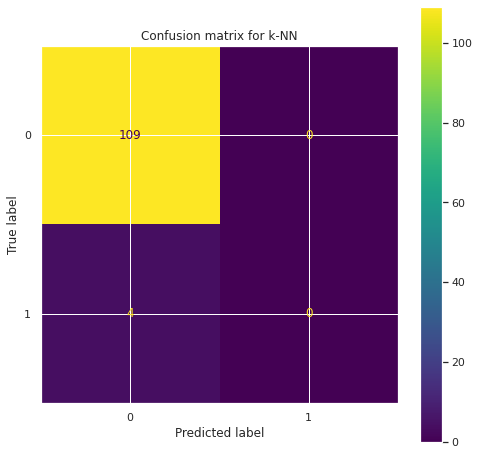

Logistic regression classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.75      0.86         4

    accuracy                           0.99       113
   macro avg       1.00      0.88      0.93       113
weighted avg       0.99      0.99      0.99       113



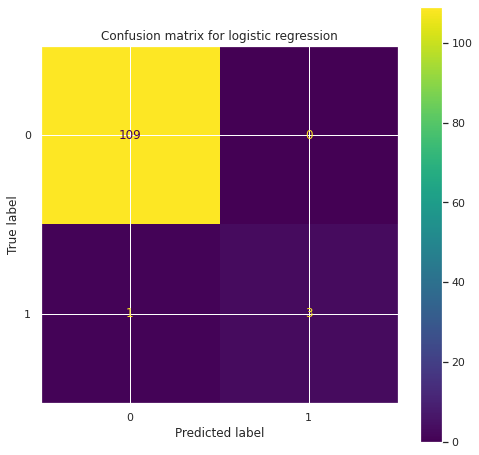

Linear SVC classification report
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       109
           1       0.60      0.75      0.67         4

    accuracy                           0.97       113
   macro avg       0.80      0.87      0.83       113
weighted avg       0.98      0.97      0.97       113



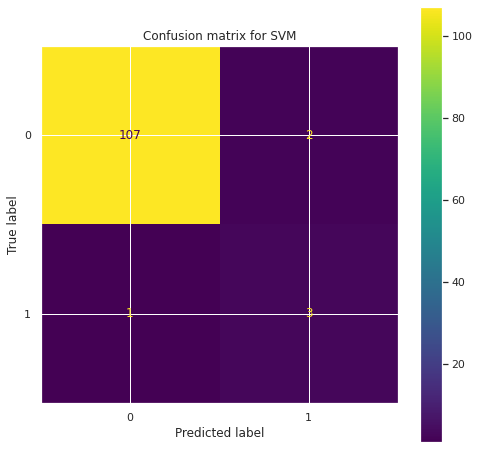

For i  10
k-NN classification report
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       104
           1       0.50      0.44      0.47         9

    accuracy                           0.92       113
   macro avg       0.73      0.70      0.71       113
weighted avg       0.92      0.92      0.92       113



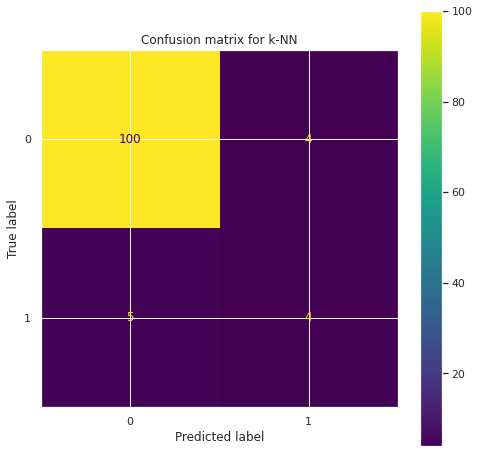

Logistic regression classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       104
           1       0.90      1.00      0.95         9

    accuracy                           0.99       113
   macro avg       0.95      1.00      0.97       113
weighted avg       0.99      0.99      0.99       113



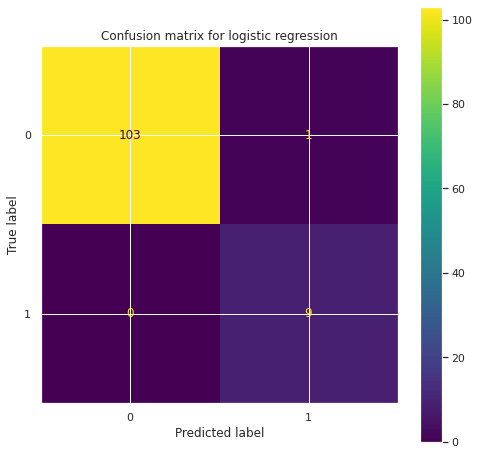

Linear SVC classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       104
           1       0.82      1.00      0.90         9

    accuracy                           0.98       113
   macro avg       0.91      0.99      0.95       113
weighted avg       0.99      0.98      0.98       113



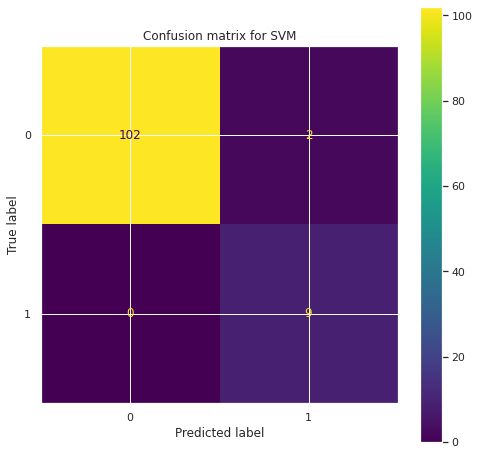

For i  14


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


k-NN classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



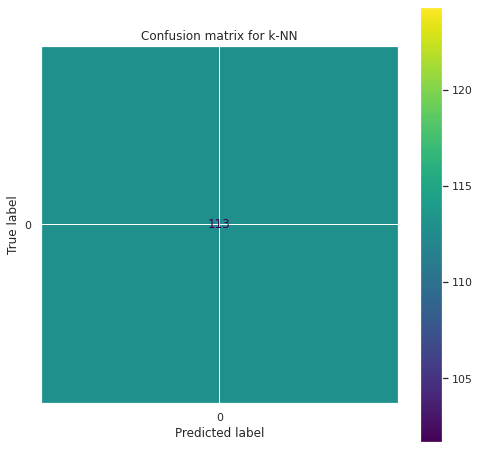

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Logistic regression classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       113

    accuracy                           1.00       113
   macro avg       1.00      1.00      1.00       113
weighted avg       1.00      1.00      1.00       113



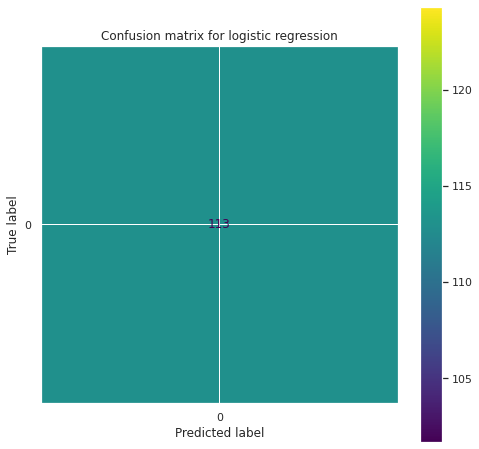

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Linear SVC classification report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       113
           1       0.00      0.00      0.00         0

    accuracy                           0.99       113
   macro avg       0.50      0.50      0.50       113
weighted avg       1.00      0.99      1.00       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


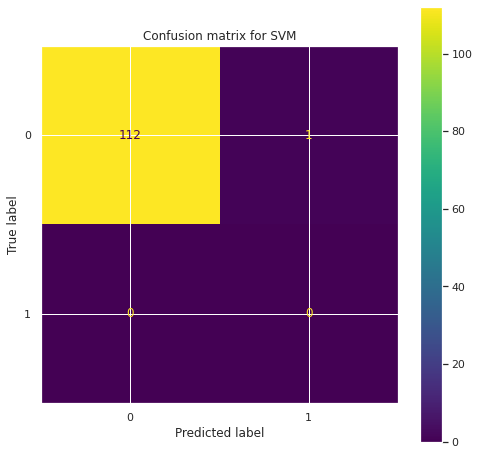

For i  15


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


k-NN classification report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       111
           1       1.00      0.50      0.67         2

    accuracy                           0.99       113
   macro avg       1.00      0.75      0.83       113
weighted avg       0.99      0.99      0.99       113



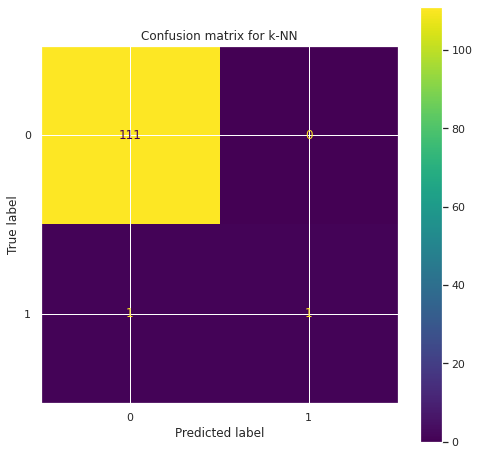

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Logistic regression classification report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       111
           1       0.00      0.00      0.00         2

    accuracy                           0.98       113
   macro avg       0.49      0.50      0.50       113
weighted avg       0.96      0.98      0.97       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


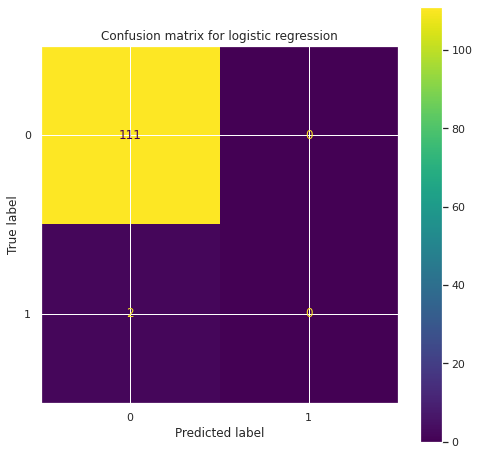

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Linear SVC classification report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       111
           1       0.00      0.00      0.00         2

    accuracy                           0.97       113
   macro avg       0.49      0.50      0.49       113
weighted avg       0.96      0.97      0.97       113



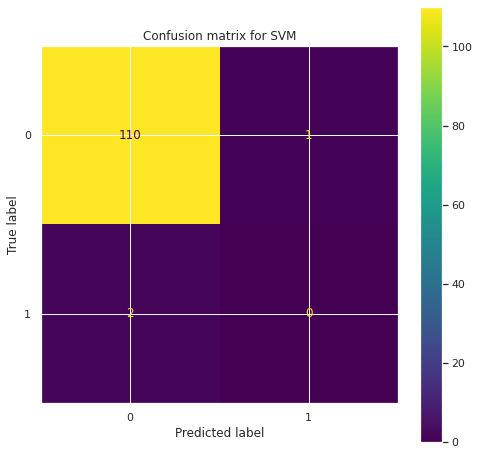

For i  16
k-NN classification report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       0.00      0.00      0.00         6

    accuracy                           0.95       113
   macro avg       0.47      0.50      0.49       113
weighted avg       0.90      0.95      0.92       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


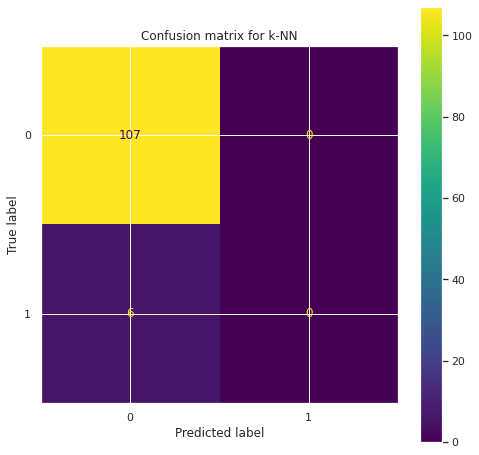

Logistic regression classification report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       107
           1       0.50      0.33      0.40         6

    accuracy                           0.95       113
   macro avg       0.73      0.66      0.69       113
weighted avg       0.94      0.95      0.94       113



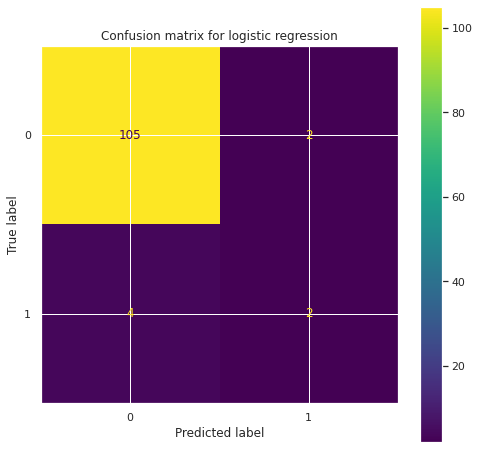

Linear SVC classification report
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       107
           1       0.56      0.83      0.67         6

    accuracy                           0.96       113
   macro avg       0.77      0.90      0.82       113
weighted avg       0.97      0.96      0.96       113



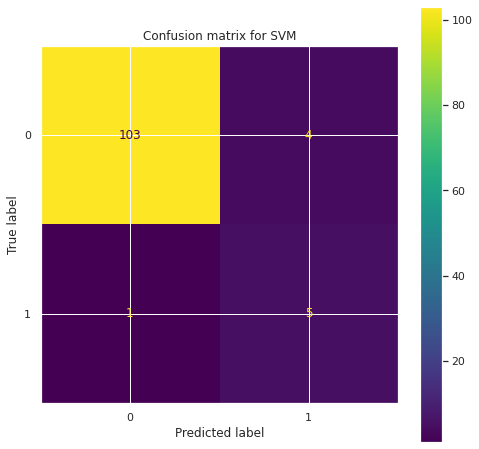

In [108]:
for i in range(2, 17):
  if i != 11 and i != 12 and i != 13:
    print("For i ", i)
    data_train_y_is_i = (data_train_y == i).astype(int)
    data_test_y_is_i = (data_test_y == i).astype(int)
    output2 = pd.DataFrame(index=None, columns=['model','train_Rsquare', 'test_Rsquare', 'train_MSE','test_MSE'])

    #k-NN
    #
    param_grid={'weights':['distance', 'uniform'], 'n_neighbors':range(1,100)}
    grid_search = GridSearchCV( KNeighborsClassifier(),param_grid, cv = 10)
    grid_search.fit(data_train_x, data_train_y_is_i)
    train_Rsquare = grid_search.score(data_train_x, data_train_y_is_i)
    test_Rsquare = grid_search.score(data_test_x, data_test_y_is_i)
    train_MSE = mean_squared_error(data_train_y_is_i, grid_search.predict(data_train_x))
    test_MSE = mean_squared_error(data_test_y_is_i, grid_search.predict(data_test_x))
    output2 = output2.append(pd.Series({'model':'KNN Classifier','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
    knn = grid_search.best_estimator_
    knn.fit(data_train_x, data_train_y_is_i)
    pred = knn.predict(data_test_x)
    print("k-NN classification report")
    print(classification_report(data_test_y_is_i, pred))
    confusion_matrix = metrics.confusion_matrix(data_test_y_is_i, pred)
    plt.rcParams['figure.figsize'] = [8, 8]
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.title("Confusion matrix for k-NN")
    plt.show()

    #logistic regression
    #
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

    grid_search_log = GridSearchCV(LogisticRegression(penalty='l2'), param_grid, cv=5)
    grid_search_log.fit(data_train_x, data_train_y_is_i)
    train_Rsquare = grid_search_log.score(data_train_x, data_train_y_is_i)
    test_Rsquare = grid_search_log.score(data_test_x, data_test_y_is_i)
    train_MSE = mean_squared_error(data_train_y_is_i, grid_search_log.predict(data_train_x))
    test_MSE = mean_squared_error(data_test_y_is_i, grid_search_log.predict(data_test_x))
    output2 = output2.append(pd.Series({'model':'Logistic Regression','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
    log = grid_search_log.best_estimator_
    log.fit(data_train_x, data_train_y_is_i)
    pred = log.predict(data_test_x)
    print("Logistic regression classification report")
    print(classification_report(data_test_y_is_i,pred))
    confusion_matrix = metrics.confusion_matrix(data_test_y_is_i, pred)
    plt.rcParams['figure.figsize'] = [8, 8]
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.title("Confusion matrix for logistic regression")
    plt.show()

    #linear SVC
    #
    param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000], 'max_iter':[1000,10000] }

    grid_search_SVC = GridSearchCV(LinearSVC(random_state=0), param_grid, cv=5)
    grid_search_SVC.fit(data_train_x, data_train_y_is_i)
    train_Rsquare = grid_search_SVC.score(data_train_x, data_train_y_is_i)
    test_Rsquare = grid_search_SVC.score(data_test_x, data_test_y_is_i)
    train_MSE = mean_squared_error(data_train_y_is_i, grid_search_SVC.predict(data_train_x))
    test_MSE = mean_squared_error(data_test_y_is_i, grid_search_SVC.predict(data_test_x))
    output2 = output2.append(pd.Series({'model':'Linear SVC','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
    linearsvc = grid_search_SVC.best_estimator_
    linearsvc.fit(data_train_x, data_train_y_is_i)
    pred = linearsvc.predict(data_test_x)
    print("Linear SVC classification report")
    print(classification_report(data_test_y_is_i,pred))
    confusion_matrix = metrics.confusion_matrix(data_test_y_is_i, pred)
    plt.rcParams['figure.figsize'] = [8, 8]
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
    cm_display.plot()
    plt.title("Confusion matrix for SVM")
    plt.show()

Zatim provodimo klasifikaciju nad svim podacima.

In [109]:
output3 = pd.DataFrame(index=None, columns=['model','train_Rsquare', 'test_Rsquare', 'train_MSE','test_MSE'])

##k-NN

In [110]:
param_grid={'weights':['distance', 'uniform'], 'n_neighbors':range(1,100)}
grid_search = GridSearchCV( KNeighborsClassifier(),param_grid, cv = 10)
grid_search.fit(data_train_x, data_train_y)
train_Rsquare = grid_search.score(data_train_x, data_train_y)
test_Rsquare = grid_search.score(data_test_x, data_test_y)
train_MSE = mean_squared_error(data_train_y, grid_search.predict(data_train_x))
test_MSE = mean_squared_error(data_test_y, grid_search.predict(data_test_x))
output3 = output3.append(pd.Series({'model':'KNN Classifier','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
knn = grid_search.best_estimator_
knn.fit(data_train_x, data_train_y)
pred = knn.predict(data_test_x)
print("k-NN classification report")
print(classification_report(data_test_y, pred))


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


k-NN classification report
              precision    recall  f1-score   support

           1       0.52      0.96      0.67        57
           2       1.00      0.14      0.25        14
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         4
          10       1.00      0.22      0.36         9
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         6

    accuracy                           0.52       113
   macro avg       0.23      0.12      0.12       113
weighted avg       0.47      0.52      0.40       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


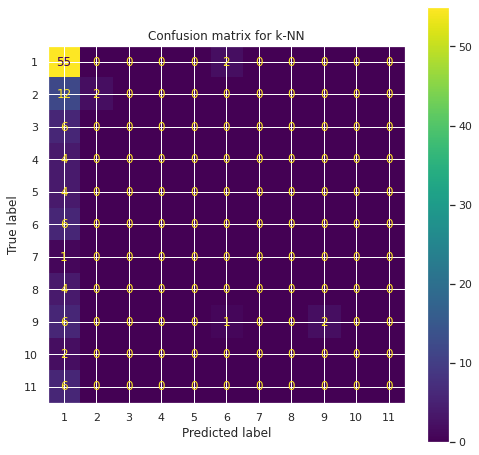

In [111]:
confusion_matrix = metrics.confusion_matrix(data_test_y, pred)
plt.rcParams['figure.figsize'] = [8, 8]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.arange(1, 17))
cm_display.plot()
plt.title("Confusion matrix for k-NN")
plt.show()

## Logistička regresija

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules

Logistic regression classification report
              precision    recall  f1-score   support

           1       0.85      0.96      0.90        57
           2       0.53      0.57      0.55        14
           3       1.00      0.67      0.80         6
           4       0.75      0.75      0.75         4
           5       0.00      0.00      0.00         4
           6       0.25      0.33      0.29         6
           8       0.00      0.00      0.00         1
           9       1.00      0.25      0.40         4
          10       0.90      1.00      0.95         9
          15       0.00      0.00      0.00         2
          16       0.50      0.33      0.40         6

    accuracy                           0.74       113
   macro avg       0.53      0.44      0.46       113
weighted avg       0.72      0.74      0.72       113



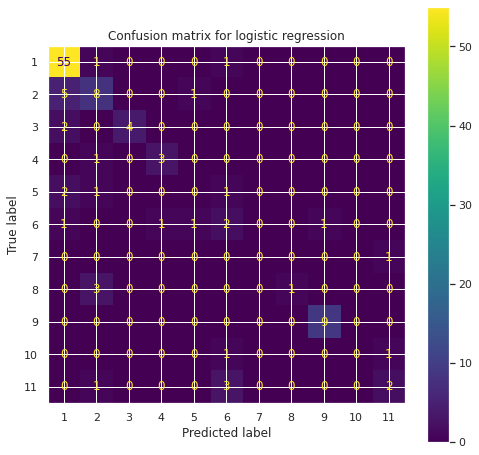

In [112]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid_search_log = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_log.fit(data_train_x, data_train_y)
train_Rsquare = grid_search_log.score(data_train_x, data_train_y)
test_Rsquare = grid_search_log.score(data_test_x, data_test_y)
train_MSE = mean_squared_error(data_train_y, grid_search_log.predict(data_train_x))
test_MSE = mean_squared_error(data_test_y, grid_search_log.predict(data_test_x))
output3 = output3.append(pd.Series({'model':'Logistic Regression','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
log = grid_search_log.best_estimator_
log.fit(data_train_x, data_train_y)
pred = log.predict(data_test_x)
print("Logistic regression classification report")
print(classification_report(data_test_y,pred))
confusion_matrix = metrics.confusion_matrix(data_test_y, pred)
plt.rcParams['figure.figsize'] = [8, 8]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.arange(1, 17))
cm_display.plot()
plt.title("Confusion matrix for logistic regression")
plt.show()

##Linearni SVM

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVC classification report
              precision    recall  f1-score   support

           1       0.78      0.98      0.87        57
           2       0.67      0.43      0.52        14
           3       0.71      0.83      0.77         6
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         6
           8       0.00      0.00      0.00         1
           9       0.67      0.50      0.57         4
          10       0.90      1.00      0.95         9
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         2
          16       0.67      0.67      0.67         6

    accuracy                           0.76       113
   macro avg       0.45      0.45      0.45       113
weighted avg       0.68      0.76      0.71       113



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

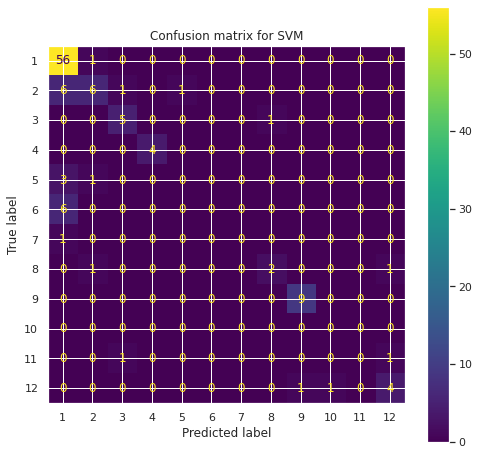

In [115]:
param_grid = {'C': [0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 1000], 'max_iter':[1000,10000] }

grid_search_SVC = GridSearchCV(LinearSVC(random_state=0), param_grid, cv=5)
grid_search_SVC.fit(data_train_x, data_train_y)
train_Rsquare = grid_search_SVC.score(data_train_x, data_train_y)
test_Rsquare = grid_search_SVC.score(data_test_x, data_test_y)
train_MSE = mean_squared_error(data_train_y, grid_search_SVC.predict(data_train_x))
test_MSE = mean_squared_error(data_test_y, grid_search_SVC.predict(data_test_x))
output3 = output3.append(pd.Series({'model':'Linear SVC','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE}),ignore_index=True )
linearsvc = grid_search_SVC.best_estimator_
linearsvc.fit(data_train_x, data_train_y)
pred = linearsvc.predict(data_test_x)
print("Linear SVC classification report")
print(classification_report(data_test_y,pred))
confusion_matrix = metrics.confusion_matrix(data_test_y, pred)
plt.rcParams['figure.figsize'] = [8, 8]
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = np.arange(1, 17))
cm_display.plot()
plt.title("Confusion matrix for SVM")
plt.show()

In [114]:
print(output3)

                 model  train_Rsquare  test_Rsquare  train_MSE   test_MSE
0       KNN Classifier       1.000000      0.522124   0.000000  25.530973
1  Logistic Regression       1.000000      0.743363   0.000000   8.221239
2           Linear SVC       0.946903      0.761062  31.622419   5.238938
